In [71]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
import soundfile as sf
from scipy.signal import medfilt
import scipy.fftpack as fft
file_path = "../Sample-Data-Cafe-5.wav"
y, sr = librosa.load(file_path, sr=None)

In [72]:
#perform STFT to audio signal, and get the audio magnitude & phase
S_full, phase = librosa.magphase(librosa.stft(y))

In [73]:
#estimating noise power of the audio signal
noise_power = np.mean(S_full[:, :], axis=1)
noise_power

array([2.0612400e+00, 4.5261950e+00, 6.7616992e+00, ..., 1.5383773e-04,
       1.5294745e-04, 1.3867959e-04], dtype=float32)

In [74]:
#create a mask to identify when signal magnitude exceeds the estimated noise power
#smooth the mask using a median filter to avoid abrupt changes.
mask = S_full > noise_power[:, None]
mask = mask.astype(float)
mask = medfilt(mask, kernel_size=(1, 5))
s_clean = S_full * mask

In [75]:
#inverse STFT to convert the cleaned magnitude data back to the time domain
y_clean = librosa.istft(s_clean * phase)

In [76]:
#save audio to wav format
sf.write("stft_filtered_6.wav", y_clean, sr)

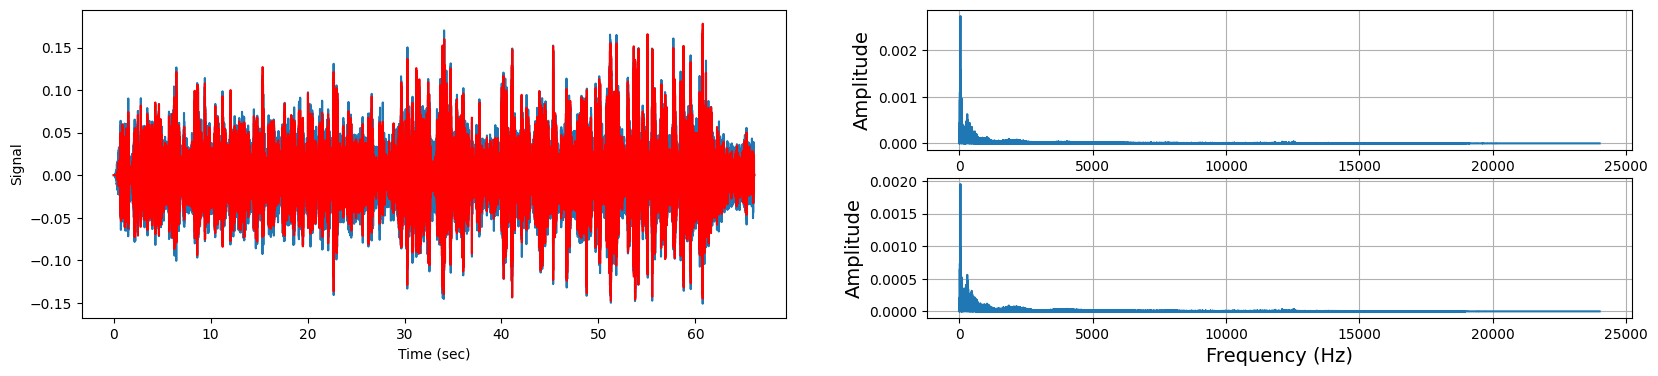

In [77]:
n = len(y)
yf = fft.fft(y)
yf_clean = fft.fft(y_clean)
xf = np.linspace(0.0, sr / 2.0, n // 2)

fig = plt.figure(figsize=(20, 4))
gs=fig.add_gridspec(2,2)

ax1=fig.add_subplot(gs[:,0])
ax2=fig.add_subplot(gs[0,1])
ax3=fig.add_subplot(gs[1,1])

t = np.array(range(0, len(y))) / sr
ax1.plot(t,y,label='Input')
ax1.plot(t,y_clean.real,color='r',label='output')
ax1.set_xlabel('Time (sec)')
ax1.set_ylabel('Signal')

ax2.plot(xf, 2.0 / n * np.abs(yf[:n // 2]))
ax2.set_xlabel('Frequency (Hz)',fontsize=14)
ax2.set_ylabel('Amplitude',fontsize=14)
ax2.grid()

ax3.plot(xf, 2.0 / n * np.abs(yf_clean[:n // 2]))
ax3.set_xlabel('Frequency (Hz)',fontsize=14)
ax3.set_ylabel('Amplitude',fontsize=14)
ax3.grid()